In [1]:
# import libraries
import numpy as np
import pandas as pd
import dionysus as d
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import re
from functools import *
import mplcursors

%matplotlib widget

In [2]:
# define the classes
class Point:
    id: int
    coord: np.ndarray
    dominant: int
    second_dominant: int
    values: list[float]
    tissue: bool

point_list: list[Point] = []
edge_set: set[tuple[int]] = set()
triangle_set: set[tuple[int]] = set()
tetrahedron_set: set[tuple[int]] = set()


In [3]:
# load from st data files
points_data = pd.read_csv("assets/HT112C1/points.csv", header=None)
tets_data = pd.read_csv("assets/HT112C1/tets.csv", header=None)

# load from toy data files
# points_data = pd.read_csv("assets/torus-points.csv")
# tets_data = pd.read_csv("assets/torus-tets.csv")

# load from new toy data files
# points_data = pd.read_csv("assets/toy-data-5/points.csv", header=None)
# tets_data = pd.read_csv("assets/toy-data-5/tets.csv", header=None)

# points_data = pd.read_csv("assets/small-torus/points.csv", header=None)
# tets_data = pd.read_csv("assets/small-torus/tets.csv", header=None)

if points_data.isna().any().any():
    raise ValueError("NaN values detected in the data file!")

In [4]:
coords = points_data.iloc[:, :3]
x_limits = coords.iloc[:, 0].agg(["min", "max"]).tolist()
y_limits = coords.iloc[:, 1].agg(["min", "max"]).tolist()
z_limits = coords.iloc[:, 2].agg(["min", "max"]).tolist()

x_range = abs(x_limits[1] - x_limits[0])
x_middle = (x_limits[0] + x_limits[1]) / 2
y_range = abs(y_limits[1] - y_limits[0])
y_middle = (y_limits[0] + y_limits[1]) / 2
z_range = abs(z_limits[1] - z_limits[0])
z_middle = (z_limits[0] + z_limits[1]) / 2

plot_radius = 0.5 * max([x_range, y_range, z_range])

# plot the point cloud
# fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(points_data.iloc[:, 0].to_numpy(), points_data.iloc[:, 1].to_numpy(), points_data.iloc[:, 2].to_numpy())
# ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
# ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
# ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
# plt.show()

In [5]:
num_materials = points_data.shape[1] - 3

for i, row in points_data.iterrows():
    point = Point()
    point.id = i
    point.coord = row.iloc[:3]
    values = row.iloc[3:]
    point.dominant = values.idxmax() - 3
    point.second_dominant = values.nlargest(2).iloc[1:].idxmax() - 3
    point.values = values.to_list()
    point.tissue = point.dominant != num_materials - 1
    point_list.append(point)


edge_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
triangle_combinations = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]

for i, tet in tets_data.iterrows():
    edges = [sorted([tet.iloc[combination[0]], tet.iloc[combination[1]]]) for combination in edge_combinations]
    [edge_set.add(tuple(x)) for x in edges]
    triangles = [sorted([tet.iloc[combination[0]], tet.iloc[combination[1]], tet.iloc[combination[2]]]) for combination in triangle_combinations]
    [triangle_set.add(tuple(x)) for x in triangles]
    tetrahedron_set.add(tuple(sorted(tet)))

In [6]:
points_by_material = [[] for _ in range(num_materials)]
faces_by_material = [[] for _ in range(num_materials)]
point_index_in_material_group = {}
face_index_in_material_group = {}

for i, point in enumerate(point_list):
    points_by_material[point.dominant].append(point)
    point_index_in_material_group[i] = len(points_by_material[point.dominant]) - 1

for i, triangle in enumerate(triangle_set):
    if point_list[triangle[0]].dominant == point_list[triangle[1]].dominant and point_list[triangle[0]].dominant == point_list[triangle[2]].dominant:
        faces_by_material[point_list[triangle[0]].dominant].append(triangle)
        face_index_in_material_group[i] = len(faces_by_material[point_list[triangle[0]].dominant]) - 1

Material 0 has no points
Material 1 has no points
Material 2 has no points
Material 3 has 18432 points, 110996 edges, 175874 triangles, 83309 tets, 388611 simplices in total
Material 3 dimension 0 has 294 finite points and 1 infinite points


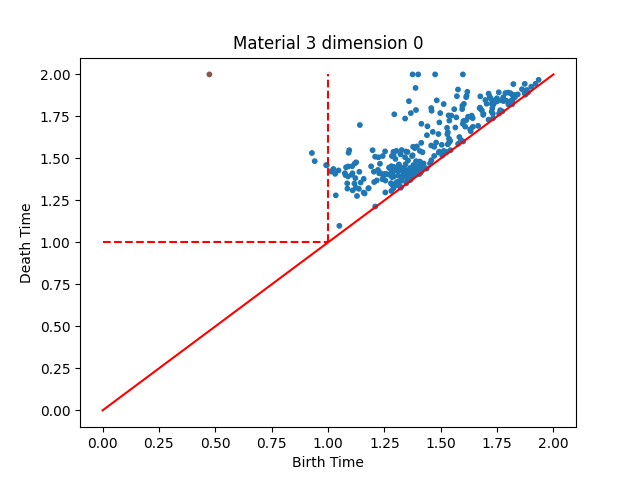

Material 3 dimension 1 has 318 finite points and 0 infinite points


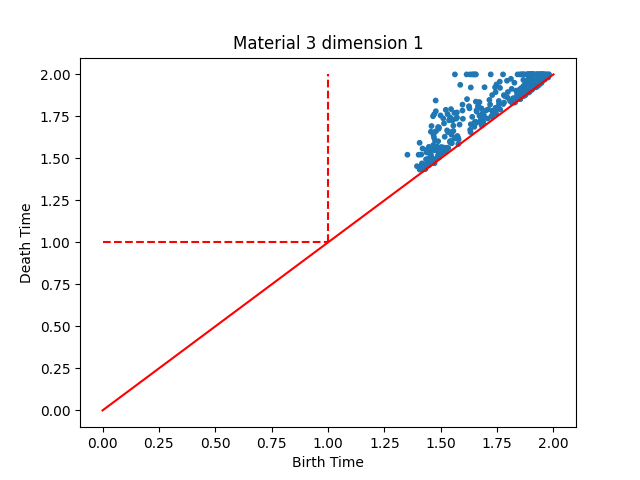

Material 3 has 5 but no faces, 3D mesh display skipped
Material 4 has 18432 points, 110996 edges, 175874 triangles, 83309 tets, 388611 simplices in total
Material 4 dimension 0 has 274 finite points and 1 infinite points


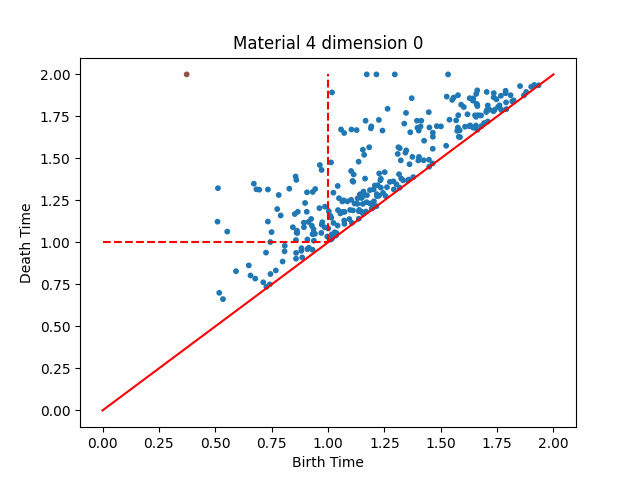

Material 4 dimension 1 has 279 finite points and 0 infinite points


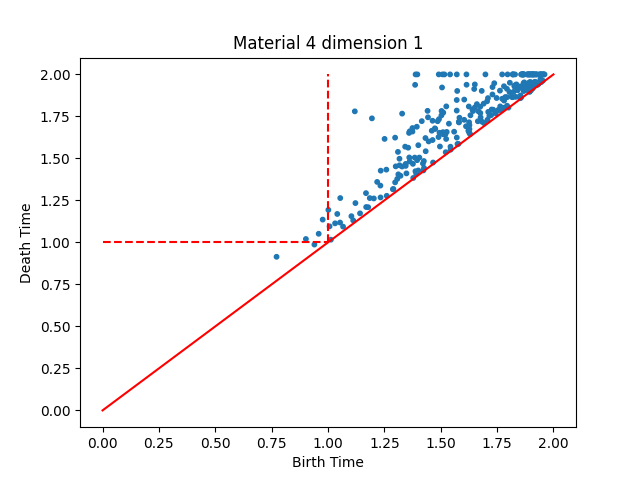

Material 4 has 220 points and 246 faces


Material 5 has no points
Material 6 has no points
Material 7 has 18432 points, 110996 edges, 175874 triangles, 83309 tets, 388611 simplices in total
Material 7 dimension 0 has 254 finite points and 1 infinite points


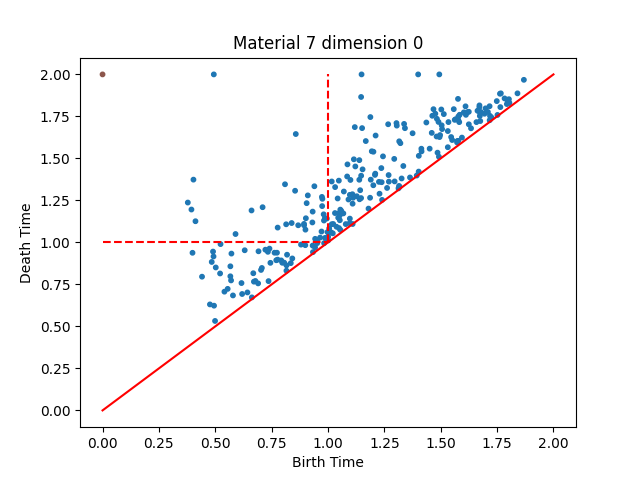

Material 7 dimension 1 has 295 finite points and 0 infinite points


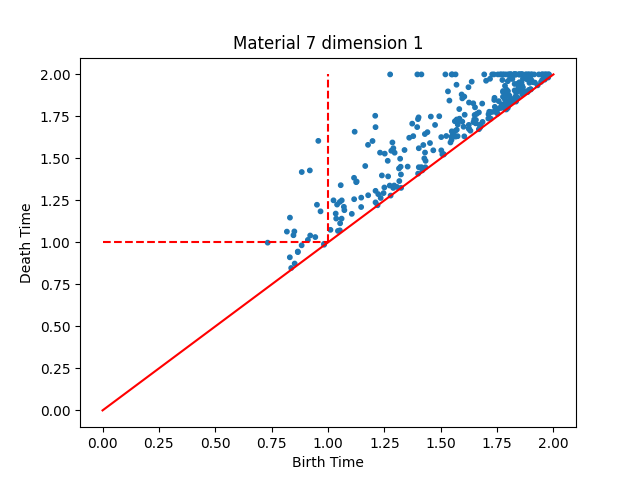

Material 7 has 405 points and 603 faces


Material 8 has no points
Material 9 has no points
Material 10 has no points
Material 11 has no points
Material 12 has no points
Material 13 has 18432 points, 110996 edges, 175874 triangles, 83309 tets, 388611 simplices in total
Material 13 dimension 0 has 285 finite points and 1 infinite points


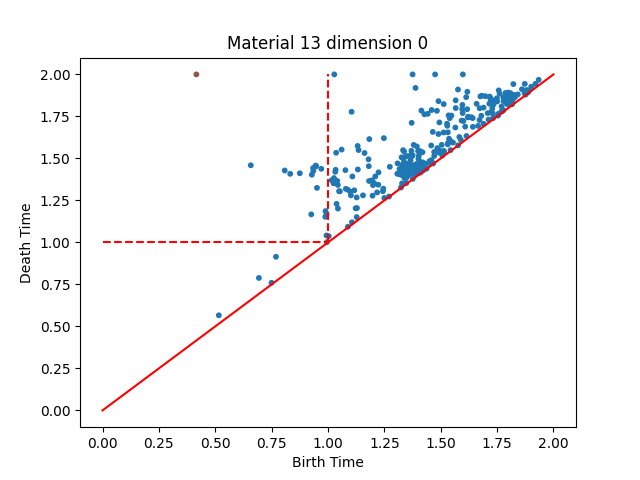

Material 13 dimension 1 has 299 finite points and 0 infinite points


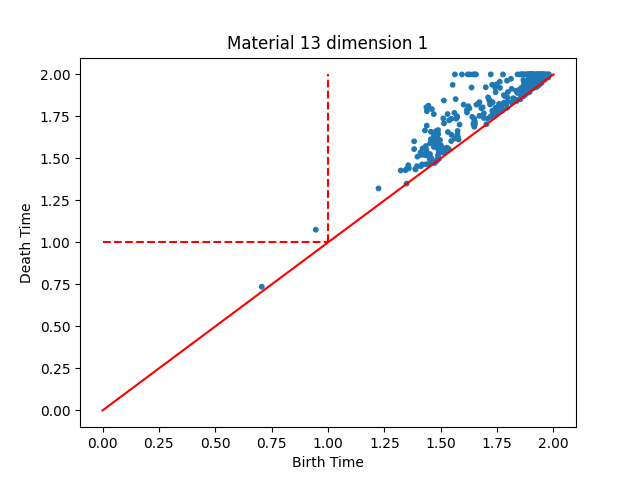

Material 13 has 97 points and 277 faces


Material 14 has 18432 points, 110996 edges, 175874 triangles, 83309 tets, 388611 simplices in total
Material 14 dimension 0 has 241 finite points and 1 infinite points


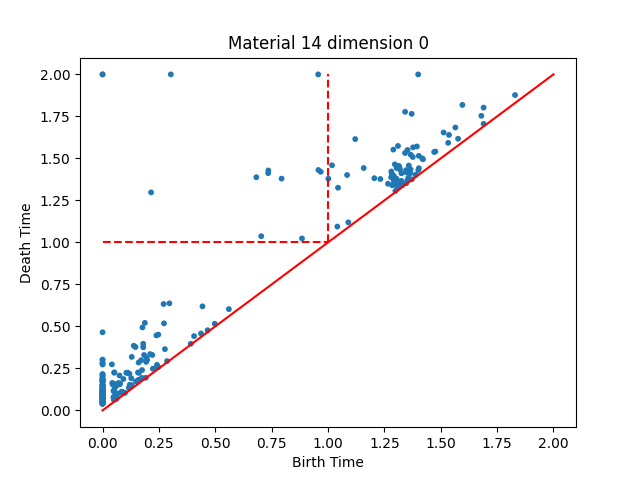

Material 14 dimension 1 has 301 finite points and 0 infinite points


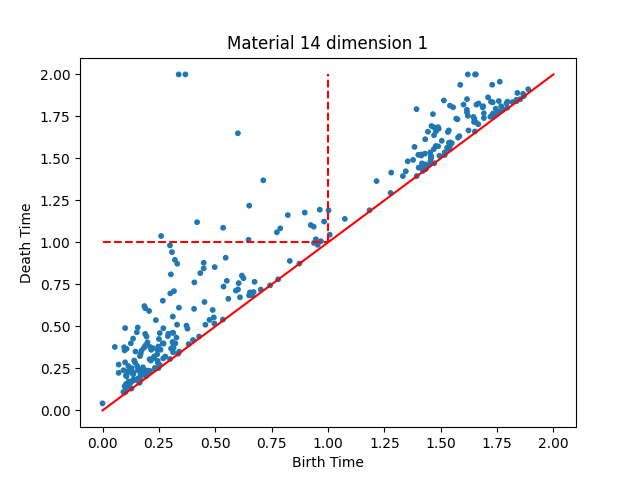

Material 14 has 2190 points and 11468 faces


Material 15 has 18432 points, 110996 edges, 175874 triangles, 83309 tets, 388611 simplices in total
Material 15 dimension 0 has 261 finite points and 1 infinite points


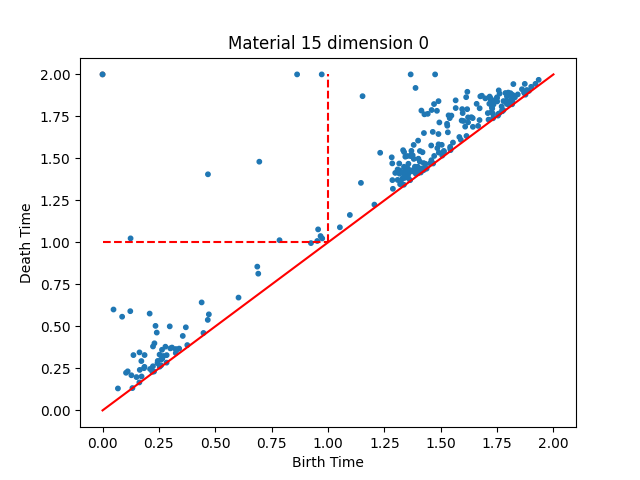

Material 15 dimension 1 has 274 finite points and 0 infinite points


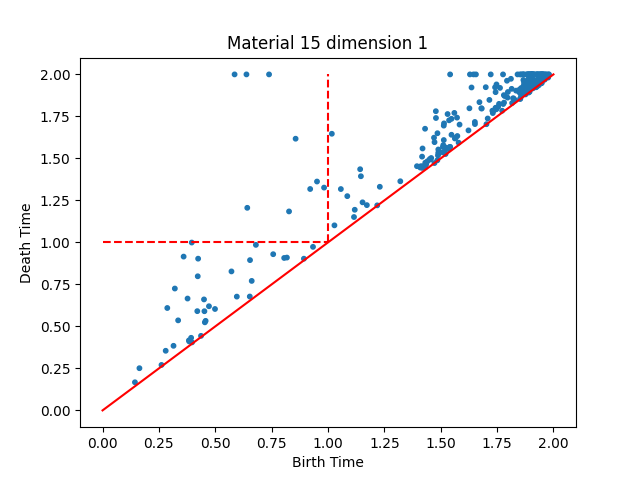

Material 15 has 785 points and 3261 faces


Material 16 has no points
Skipping no tissue points


In [7]:
generator_by_material_and_dimension = [[] for _ in range(num_materials)]
filtrations_by_material = [[] for _ in range(num_materials)]
ph_matrix_by_material = [[] for _ in range(num_materials)]
diagrams_by_material = [[] for _ in range(num_materials)]

def get_value(point, material):
    values = point.values
    if material == point.dominant:
        return values[point.dominant] - values[point.second_dominant]
    else:
        return values[material] - values[point.dominant]


# iterate through the materials
for material in range(num_materials):
    if len(points_by_material[material]) == 0:
        print(f"Material {material} has no points")
        continue
    elif material == num_materials - 1:
        print("Skipping no tissue points")
        continue

    points = [([point.id], 1 - get_value(point, material)) for point in point_list]
    edges = [(list(edge), 1 - min([get_value(point_list[point], material) for point in edge])) for edge in edge_set]
    triangles = [(list(triangle), 1 - min([get_value(point_list[point], material) for point in triangle])) for triangle in triangle_set]
    tets = [(list(tet), 1 - min([get_value(point_list[point], material) for point in tet])) for tet in tetrahedron_set]

    simplices = []
    simplices.extend(points)
    simplices.extend(edges)
    simplices.extend(triangles)
    simplices.extend(tets)

    print(f"Material {material} has {len(points)} points, {len(edges)} edges, {len(triangles)} triangles, {len(tets)} tets, {len(simplices)} simplices in total")

    filtration = d.Filtration()
    for vertices, time in simplices:
        filtration.append(d.Simplex(vertices, time))
    filtration.sort()

    ph_matrix = d.homology_persistence(filtration, method="column")
    diagrams = d.init_diagrams(ph_matrix, filtration)

    for i, diagram in enumerate(diagrams):
        # skip the 3-cycles (does not exist) and empty diagrams
        if i == 3 or len(diagram) == 0:
            continue

        plt.figure()
        plt.title(f"Material {material} dimension {i}")
        filtered_diagram = [pt for pt in diagram if pt.birth < pt.death]
        if len(diagram) != len(filtered_diagram):
            print(f"{len(diagram)-len(filtered_diagram)} points got filtered out")

        num_infinite_points = reduce(lambda x, y: x + 1 if y.death == float('inf') else x, filtered_diagram, 0)
        num_finite_points = len(filtered_diagram) - num_infinite_points

        print(f"Material {material} dimension {i} has {num_finite_points} finite points and {num_infinite_points} infinite points")

        # using plt.scatter instead of dionysus built in plot feature
        birth_times = list(map(lambda pt: pt.birth, filtered_diagram))
        death_times = list(map(lambda pt: pt.death if pt.death != float('inf') else 2.0, filtered_diagram))
        colors = list(map(lambda pt: 'tab:blue' if pt.death != float('inf') else 'tab:brown', filtered_diagram))
        the_scatter = plt.scatter(birth_times, death_times, s=10, color=colors)
        plt.plot([0, 2], [0, 2], "r")
        plt.plot([1, 1], [1, 2], "r--")
        plt.plot([0, 1], [1, 1], "r--")
        plt.xlabel("Birth Time")
        plt.ylabel("Death Time")
        plt.show()

        mplcursors.cursor(the_scatter).connect(
            "add", lambda sel, filtered_diagram=filtered_diagram: 
            sel.annotation.set_text(f"Simplex Index: {sel.index}\nBirth: {filtered_diagram[sel.index].birth:.2f}\nDeath: {filtered_diagram[sel.index].death:.2f}")
        )


    # dictionary to reverse lookup the killer of a cycle
    pairs = {}
    for j in range(len(ph_matrix)):
        if ph_matrix.pair(j) != ph_matrix.unpaired:
            pairs[ph_matrix.pair(j)] = j


    # finding the generators for 1 and 2 cycle
    diagrams_sorted = [[] for _ in range(4)]
    generators_by_dimension = [None for _ in range(4)]
    for dimension, diagram in enumerate(diagrams):
        generators = []
        diagram_sorted = sorted(list(filter(lambda x: x[1] != float("inf"), map(lambda x: (x, x.death - x.birth), diagram))), reverse=True, key=lambda x: x[1])
        diagrams_sorted[dimension] = diagram_sorted
        for (point, lifespan) in diagram_sorted:
            if point.birth > 1.0 or point.death < 1.0 or point.death == float("inf"):
                continue

            generator = [[int(s) for s in re.findall(r'<(.*?)>', str(filtration[int(index)]))[0].split(',')] for index in re.findall(r'\*(\d+)', str(ph_matrix[pairs.get(point.data)]))] if pairs.get(point.data) != None else []
            generators.append((generator, point.death - point.birth))
        generators_by_dimension[dimension] = [g[0] for g in generators]
    generator_by_material_and_dimension[material] = generators_by_dimension

    vertices = [list(point.coord) for point in points_by_material[material]]
    intensities = [point.values[material] for point in points_by_material[material]]
    faces = [[point_index_in_material_group[v] for v in face] for face in faces_by_material[material]]

    num_one_cycles = len(generators_by_dimension[1])
    num_two_cycles = len(generators_by_dimension[2])
    one_cycles_lengths = [len(loop) for loop in generators_by_dimension[1]]
    two_cycles_lengths = [len(loop) for loop in generators_by_dimension[2]]
    total_num_edges = reduce(lambda x, y: x + y, one_cycles_lengths) if num_one_cycles else 0
    total_num_triangles = reduce(lambda x, y: x + y, two_cycles_lengths) if num_two_cycles else 0

    one_cycle_index_range = []
    two_cycle_index_range = []
    accumulation = 0
    for length in one_cycles_lengths:
        if length: 
            index_range = (accumulation, accumulation + length - 1)
        else:
            index_range = (-1, -1)
        one_cycle_index_range.append(index_range)
        accumulation += length
    for length in two_cycles_lengths:
        if length: 
            index_range = (accumulation, accumulation + length - 1)
        else:
            index_range = (-1, -1)
        two_cycle_index_range.append(index_range)
        accumulation += length
    

    if len(faces) == 0: 
        print(f"Material {material} has {len(vertices)} but no faces, 3D mesh display skipped")
        continue
    else:
        print(f"Material {material} has {len(vertices)} points and {len(faces)} faces")

    x, y, z = zip(*vertices)
    i, j, k = zip(*faces)

    fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, i=i, j=j, k=k, intensity=intensities, colorscale=[[0, 'navy'], [0.25, 'cyan'], [0.5, 'lime'], [0.75, 'yellow'], [1, 'red']], opacity=0.01)])

    edge_range = (1, total_num_edges)
    triangle_range = (total_num_edges + 1, total_num_edges + total_num_triangles)
    visibility = [True] * (total_num_edges + total_num_triangles + 1)

    # target: show only the specified simplex by its index, -1 to show everything, -2 to show nothing
    # mode: 1 for edge, 2 for triangle
    def set_visibility(target, mode, visibility):
        if mode == 1:
            if target == -1:
                new_visibility = [True] + [True] * total_num_edges + visibility[triangle_range[0]:triangle_range[1]+1]
            elif target == -2:
                new_visibility = [True] + [False] * total_num_edges + visibility[triangle_range[0]:triangle_range[1]+1]
            else: 
                new_visibility = [True] + [one_cycle_index_range[target][0] <= e <= one_cycle_index_range[target][1] for e in range(total_num_edges)] + visibility[triangle_range[0]:triangle_range[1]+1]
        elif mode == 2:
            if target == -1:
                new_visibility = [True] + visibility[edge_range[0]:edge_range[1]+1] + [True] * total_num_triangles
            elif target == -2:
                new_visibility = [True] + visibility[edge_range[0]:edge_range[1]+1] + [False] * total_num_triangles
            else: 
                new_visibility = [True] + visibility[edge_range[0]:edge_range[1]+1] + [two_cycle_index_range[target][0] <= e <= two_cycle_index_range[target][1] for e in range(total_num_triangles)]
        visibility = new_visibility
        return visibility

    sliders = [{
        'steps': [
            {
                'label': f'{opacity:.1f}',
                'method': 'restyle',
                'args': [{'opacity': opacity}, [0]]
            } for opacity in [i/10 for i in range(1, 11)]
        ],
        'currentvalue': {'prefix': 'Opacity: ', 'font': {'size': 20}},
        'pad': {'b': 10},
        'len': 0.9,
        'x': 0.1,
        'xanchor': 'left',
        'y': -0.1,  
        'yanchor': 'top'
    },
    {
        'active': 0,
        'currentvalue': {'prefix': '1-cycle: ', 'font': {'size': 20}},
        'pad': {'b': 10},
        'len': 0.9,
        'x': 0.1,
        'xanchor': 'left',
        'y': -0.5, 
        'yanchor': 'top',
        'steps': [
            {
                'label': 'All',
                'method': 'update',
                'args': [{'visible': set_visibility(-1, 1, visibility)}]
            }
        ] + [
            {
                'label': f'{i+1}',
                'method': 'update',
                'args': [{'visible': set_visibility(i, 1, visibility)}]
            } for i in range(min(num_one_cycles, 10))
        ] + [
            {
                'label': 'None',
                'method': 'update',
                'args': [{'visible': set_visibility(-2, 1, visibility)}]
            }
        ]
    },
    {
        'active': 0,
        'currentvalue': {'prefix': '2-cycle: ', 'font': {'size': 20}},
        'pad': {'b': 10},
        'len': 0.9,
        'x': 0.1,
        'xanchor': 'left',
        'y': -0.9, 
        'yanchor': 'top',
        'steps': [
            {
                'label': 'All',
                'method': 'update',
                'args': [{'visible': set_visibility(-1, 2, visibility)}]
            }
        ] + [
            {
                'label': f'{i+1}',
                'method': 'update',
                'args': [{'visible': set_visibility(i, 2, visibility)}]
            } for i in range(min(num_two_cycles, 10))
        ] + [
            {
                'label': 'None',
                'method': 'update',
                'args': [{'visible': set_visibility(-2, 2, visibility)}]
            }
        ]
    }
    ]

    updatemenus=[{
        'type': 'buttons',
        'buttons': [
            {
                'label': 'Opacity 0.01',
                'method': 'restyle',
                'args': [{'opacity': 0.01}, [0]]
            },
            {
                'label': 'Opacity 0.1',
                'method': 'restyle',
                'args': [{'opacity': 0.1}, [0]]
            },
            {
                'label': 'Opacity 1.0',
                'method': 'restyle',
                'args': [{'opacity': 1.0}, [0]]
            }
        ]
    }]

    fig.update_layout(scene=dict(
        xaxis=dict(range=[x_middle - plot_radius, x_middle + plot_radius]),
        yaxis=dict(range=[y_middle - plot_radius, y_middle + plot_radius]),
        zaxis=dict(range=[z_middle - plot_radius, z_middle + plot_radius]),
        aspectmode='manual'),
        title_text=f"Material {material}",
        width=800,
        height=600,
        updatemenus=updatemenus,
        sliders=sliders
    )

    def plot_edge(fig, edge):
        edge = [list(point_list[endpoint].coord) for endpoint in edge]
        fig.add_trace(go.Scatter3d(
            x=[edge[0][0], edge[1][0], None], 
            y=[edge[0][1], edge[1][1], None], 
            z=[edge[0][2], edge[1][2], None],
            mode='lines',
            showlegend=False,
            line=dict(color='black', width=5),
            name="edges"
        ))

    def plot_triangle(fig, triangle):
        vertices = [list(point_list[endpoint].coord) for endpoint in triangle]
        fig.add_trace(go.Mesh3d(
            x=[vertices[0][0], vertices[1][0], vertices[2][0]],
            y=[vertices[0][1], vertices[1][1], vertices[2][1]],
            z=[vertices[0][2], vertices[1][2], vertices[2][2]],
            i=[0],
            j=[1],
            k=[2],
            color='grey',
            opacity=0.4,
            name="triangles"
        ))

    # display the edges of 1 and 2 cycles
    [[plot_edge(fig, edge) for edge in loop ] for loop in generators_by_dimension[1]]
    [[plot_triangle(fig, triangle) for triangle in loop ] for loop in generators_by_dimension[2]]
    fig.show()


    filtrations_by_material[material] = filtration
    ph_matrix_by_material[material] = ph_matrix
    diagrams_by_material[material] = diagrams